# Exploration

Here we perform some basic exploration of the SECOP II dataset in order to get basic insights and get some ideas on how to process the data for training the model.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

# Data Loading

In [3]:
raw_file = os.path.join("..", "data", "raw", "raw_data.csv")
df_raw = pd.read_csv(raw_file)

print(df_raw.shape)
print(df_raw.columns)

df_raw.head()

(490226, 2)
Index(['descripcion_del_proceso', 'codigo_de_categoria_principal'], dtype='object')


,descripcion_del_proceso,codigo_de_categoria_principal
0,Prestar los servicios profesionales de apoyo j...,V1.77101604
1,CONTRATAR EL SERVICIO DE GESTIÓN DE EVENTOS O ...,V1.90101604
2,Censo_Economico_2021_SECGEN_BDMGN_TH Prestació...,V1.80111500
3,PRESTAR SERVICIOS DE CARÁCTER TEMPORAL COMO IN...,V1.80111600
4,AUNAR ESFUERZOS ENTRE EL DEPARTAMENTO Y EL MUN...,V1.72141003


In [4]:
pd.isnull(df_raw).sum()

descripcion_del_proceso          0
codigo_de_categoria_principal    0
dtype: int64

As we can see, there are no entries without description or UNSPSC code.

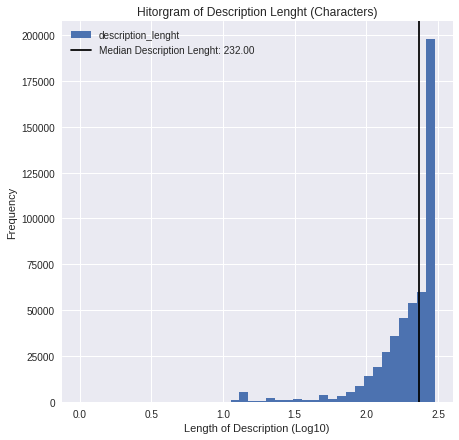

In [6]:
df_raw["description_lenght"] = df_raw.descripcion_del_proceso.map(len)

fig, ax = plt.subplots(figsize=(7, 7))
lens_log10 = df_raw["description_lenght"].map(np.log10)
lens_log10.plot.hist(bins=40, ax=ax)

median_len = lens_log10.median()
ax.axvline(median_len, label=f"Median Description Lenght: {10 ** median_len:0.2f}", color="black")

ax.set_title("Hitorgram of Description Lenght (Characters)")
ax.set_xlabel("Length of Description (Log10)")
ax.legend()
plt.show()

From these basic histograms of description texts, we can see that mosk contracts texts are rather short, with a median description length of around 232 characters (10 ^ 2,36). This in turn corresponds to around 35 words.

# Text Exploration

Now we take a quick look at one of the contracts bodies to get a better idea of what we are dealing with.

In [8]:
np.random.seed(987)
sample_df = df_raw.sample(6).reset_index(drop=True)
sample_df

,descripcion_del_proceso,codigo_de_categoria_principal,description_lenght
0,SERVICIOS PROFESIONALES PARA APOYAR Y ACOMPAÑA...,V1.80121704,239
1,EL CONTRATISTA SE OBLIGA PARA CON EL FONDO PRE...,V1.80101600,300
2,451-8-7677-PRESTAR LOS SERVICIOS DE APOYO A ...,V1.93151500,226
3,PRESTACION DE SERVICIOS PERSONALES PARA REALIZ...,V1.80161501,136
4,CONTRATAR LA PRESTACIÓN DE SERVICIOS DE APOYO ...,V1.80111701,281
5,Prestar servicios personales para Desarrollar ...,V1.80111600,154


In [9]:
print(sample_df.loc[1, "descripcion_del_proceso"])

EL CONTRATISTA SE OBLIGA PARA CON EL FONDO PRESTAS SUS SERVICIOS PROFESIONALES COMO ABOGADO PARA REALIZAR EL SEGUIMIENTO  LIQUIDACIÓN  DEPURACIÓN Y CONSOLIDACIÓN DE LA INFORMACIÓN DE LAS OBLIGACIONES POR PAGAR VIGENTES  A CARGO DE LA ALCALDÍA LOCAL DE BOSA.DE CONFORMIDAD CON LAS CONDICIONES Y OBLIG


In [10]:
print(sample_df.loc[2, "descripcion_del_proceso"])

451-8-7677-PRESTAR LOS  SERVICIOS  DE APOYO A LA GESTIÓN EN ACTIVIDADES OPERATIVAS  DE PLANTACIÓN  RECUPERACIÓN Y MANTENIMIENTO DE LAS COBERTURAS VEGETALES EN EL TERRITORIO O ZONA ASIGNADA POR LA SUBDIRECCIÓN TÉCNICA OPERATIVA
